*   Name - Akshay Dahiya
*   Date - 24/Oct/2023
*   Student Number - 2343901

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Task 2.1 Fisher Irish Data

In [2]:
## Task 2.1 ##
Iris_data = np.load('./Iris_data.npy')
Iris_labels = np.load('./Iris_labels.npy')

In [3]:
x_feature = Iris_data[:,1];
y_feature = Iris_data[:,2];

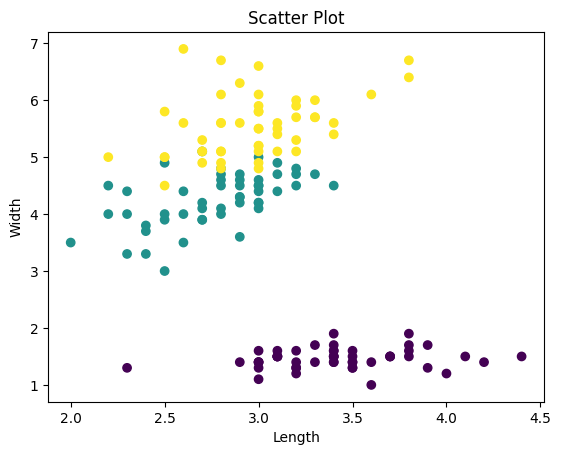

In [4]:
plt.scatter(x_feature, y_feature, c = Iris_labels)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter Plot')
plt.show()

Task 2.2 K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


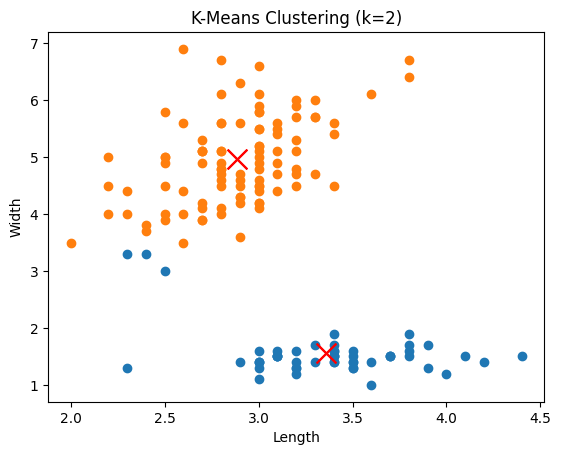

In [5]:
## Task 2.2 ## K-Means
## Importing Libraries

from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import load_iris

## Starting the Kmeans with number of clusters(k)
k = 2;
kmeans = KMeans(n_clusters=k, random_state=0)

## Fitting the Kmeans in the given Data
kmeans.fit(Iris_data)

## Predicting for cluster for every point and getting centroids
labels = kmeans.predict(Iris_data)
centroids = kmeans.cluster_centers_

## Plotting the points
for i in range(k):
    plt.scatter(Iris_data[labels == i][:, 1], Iris_data[labels == i][:, 2], label=f'Cluster {i + 1}')

    plt.scatter(centroids[:, 1], centroids[:, 2], c='Red', marker='x', s=200, label='Centroids')

plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

Task 2.3 — Gaussian Mixture Models

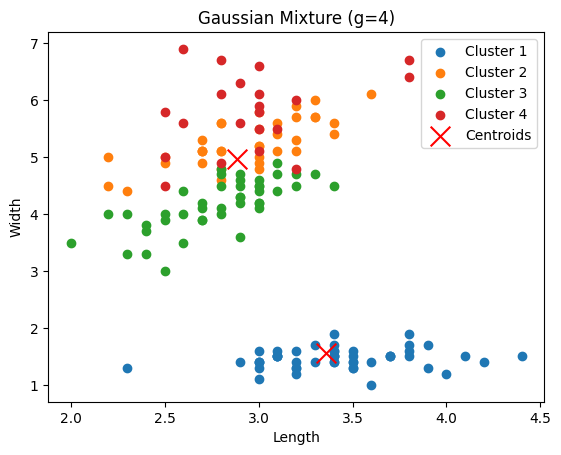

In [6]:
## Importing Library
from sklearn.mixture import GaussianMixture

## GaussianMixture(g)
g = 4
k = 4
gmm = GaussianMixture(n_components=g, random_state=0)

# Fitting the Model GaussianMixture
gmm.fit(Iris_data)

# Predicting the cluster for every point
labels = gmm.predict(Iris_data)

# The posterior probabilities for every point
probs = gmm.predict_proba(Iris_data)

for i in range(k):
    plt.scatter(Iris_data[labels == i][:, 1], Iris_data[labels == i][:, 2], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids[:, 1], centroids[:, 2], c='Red', marker='x', s=200, label='Centroids')

plt.title(f'Gaussian Mixture (g={k})')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

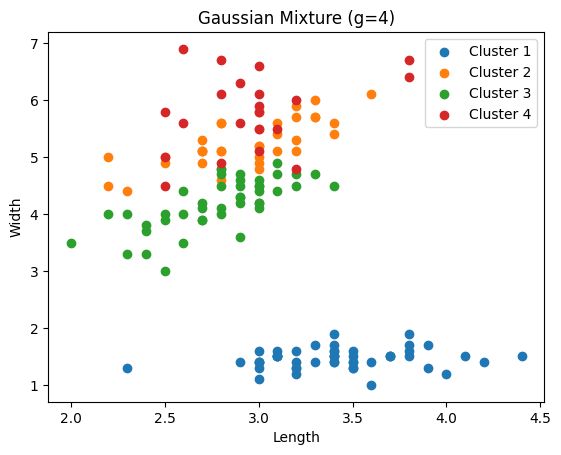

In [7]:
# The posterior probabilities for every point
probs = gmm.predict_proba(Iris_data)
for i in range(k):
    plt.scatter(Iris_data[labels == i][:, 1], Iris_data[labels == i][:, 2], label=f'Cluster {i + 1}')
    plt.title(f'Gaussian Mixture (g={k})')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

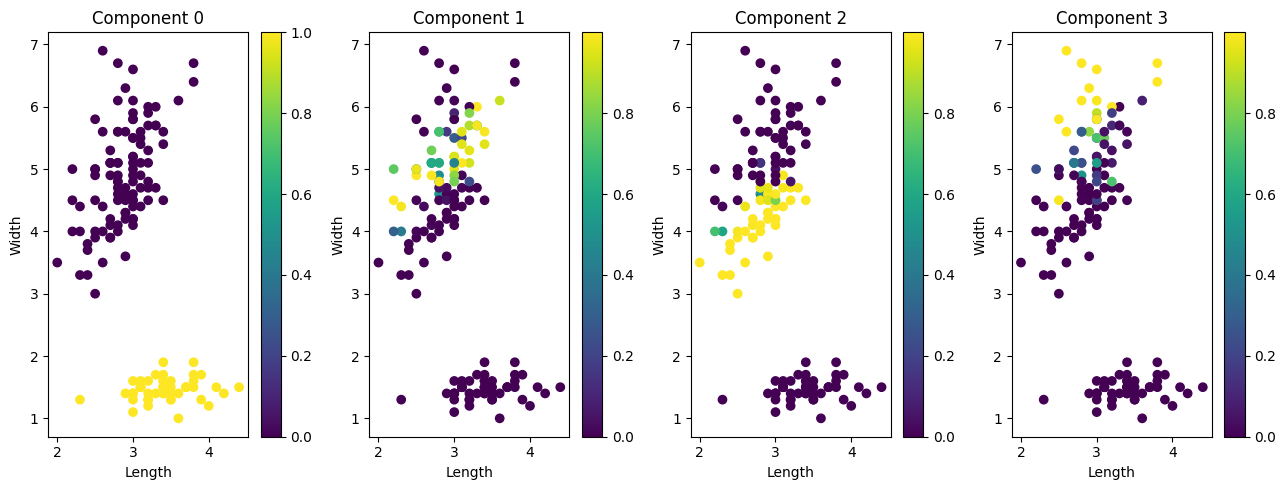

In [8]:
## Scatter plot for each component
plt.figure(figsize=(13, 5))

for i in range(g):
    plt.subplot(1, g, i + 1)
    plt.scatter(Iris_data[:, 1], Iris_data[:, 2], c=probs[:, i])
    plt.title(f'Component {i}')
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.colorbar()

plt.tight_layout()
plt.show()

Task 2.4 — Apply your skill

Number of data points: 100
Number of features: 10


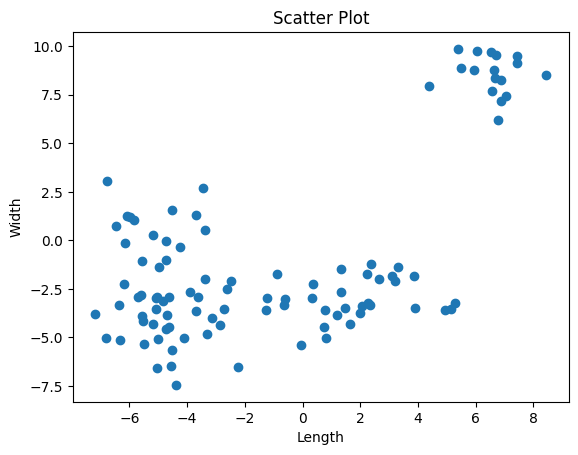

In [9]:
from sklearn.datasets import make_blobs
data = np.load("task2_4.npy");

x = data[:,1]
y = data[:,2]

plt.scatter(x, y)

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter Plot')

# Perform exploratory data analysis
num_samples, num_features = data.shape
print(f"Number of data points: {num_samples}")
print(f"Number of features: {num_features}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

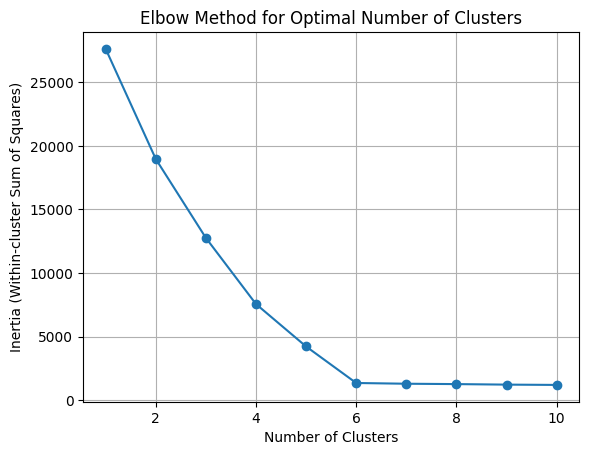

In [10]:
## To store the inertia values for different numbers of clusters
inertia = []

## Perform K-Means clustering for different numbers of clusters
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

## Plot to visualize the elbow method
plt.figure()
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid()
plt.show()

Challenge Task 2.5

In [11]:
data = np.load('./Iris_data.npy')
labels = np.load('./Iris_labels.npy')

# Choose two features dimensions to plot, keeping it consistent for the notebook
x_feature = 0
y_feature = 1

In [12]:
# Definition of euclidean distance function
def euclidean_distance(centroids, datapoints):
    '''Compute the Euclidean distance between datapoints and centroids.

    Keyword arguments:
    centroids -- KxF matrix, cluster centroids (K centroids, F dimensions)
    datapoints -- NxF matrix, data points observed (N samples, F dimensions)

    Returns:
    dists -- NxK matrix, distances from sample N_i to cluster K_i
    '''

    n_samples = datapoints.shape[0]
    n_features = datapoints.shape[1]
    n_centroids = centroids.shape[0]

    dists = np.zeros(shape=[n_samples, n_centroids])
    for k in range(n_centroids):
        differences = datapoints - centroids[k, :]
        sum_of_squared_differences = np.zeros(n_samples)
        for i_dimension in range(n_features):
            sum_of_squared_differences += differences[:, i_dimension]**2
        dists[:, k] = np.sqrt(sum_of_squared_differences)

    return dists

In [13]:
# Definition of k-Means algorithm
def k_means(data, k, n_iteration=10, verbose=None):
    '''Apply the k-means algorithm to cluster the input data into k clusters.

    Keyword arguments:
    data -- NxF matrix, the data to cluster (N samples, F dimensions)
    k -- scalar int, the number of clusters to generate
    n_iteration -- scalar int, the maximum number of iterations to carry out
    verbose -- choice of {None, 'print', 'plot'}, whether to output details of each iteration


    Returns:
    predicted_labels -- Nx1 vector, predicted cluster IDs based on k-means model (N samples)
    centroids -- KxF matrix, cluster center locations (K clusters, F dimensions)
    '''

    n_samples = data.shape[0]
    n_features = data.shape[1]

    # Initialize centroids by randomly selecting k points. Can we do this another way?
    centroids = data[np.random.choice(n_samples, k, replace=False), :]

    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids

        # Assignment step
        dists = euclidean_distance(centroids, data)
        predicted_labels = np.argmin(dists, axis=1)

        # Update step
        new_centroids = np.zeros(shape=[k, n_features])

        for i_cluster in range(k):
            # Get all datapoints alocated to cluster i_k
            cluster_data = data[predicted_labels == i_cluster, :]
            # Calculate the mean of this cluster
            new_centroids[i_cluster, :] = np.mean(cluster_data, axis=0)

        centroids = new_centroids
        update_distance = np.sum(np.abs(centroids - prev_centroids))

        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x', s=50)
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()

        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True

        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmin(euclidean_distance(centroids, data), axis=1)

    return predicted_labels, centroids

Iteration 0: update distance = 5.863089084173336
Iteration 1: update distance = 2.692688231861686
Iteration 2: update distance = 0.6585207847966782
Iteration 3: update distance = 0.0
Early stop on iteration 3


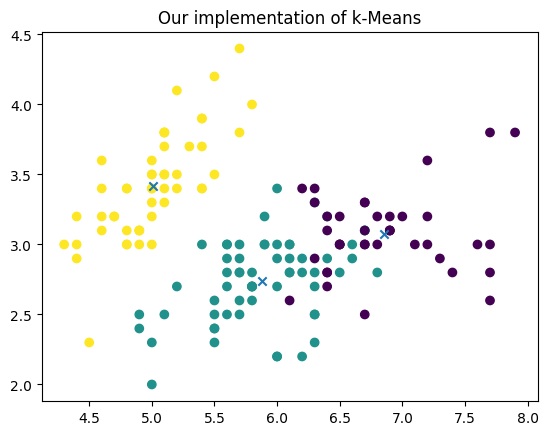

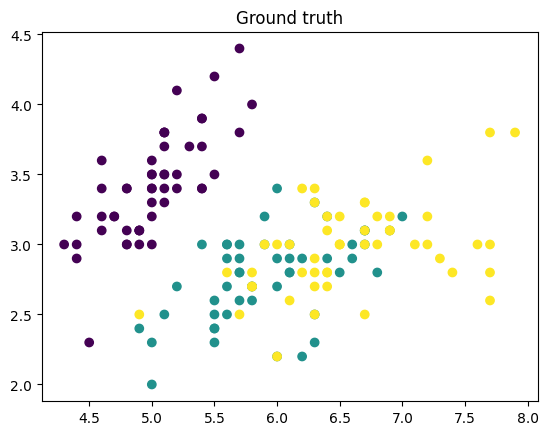

In [14]:
k = 3
n_iteration = 500

predicted_label, k_centroid = k_means(data, k, n_iteration, verbose='print')

# Visualisation of model predictions
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(k_centroid[:, x_feature], k_centroid[:, y_feature], marker='x')
plt.title('Our implementation of k-Means')
plt.show()

# Visualisation of ground truth
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground truth')
plt.show()

In [15]:
# E-Step
def multivariate_gaussian_density(data, mu, cov):
    '''Apply the E-Step of the GMM algorithm. Calculating the multivariate Gaussian density of the data.

    Keyword arguments:
    data -- 1xF, data sample (F dimensions)
    mu -- 1xF vector, mean location of the Gaussian component (F dimensions)
    cov -- FxF matrix, the covariance matrix of the Gaussian component (F dimensions)

    Returns:
    result -- scalar, the Gaussian density function response (probability)
    '''

    n_sample = data.shape[0]

    determinant = np.linalg.det(cov)
    normalisation_factor = 1.0 / ((2 * np.pi)**(n_sample / 2) * determinant ** (1.0 / 2))
    mean_centred_data = data - mu
    inverse_covariance = np.linalg.inv(cov)
    result = np.e**(-(1.0 / 2) * (mean_centred_data @ inverse_covariance @ mean_centred_data.T))
    result = normalisation_factor * result

    return result

In [16]:
# Calculate the posterior probabilities per component for each datapoint
def posterior_prob(data, centroids, cov, mix):
    '''Calculate posterior probability for each Guassian component.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component

    Returns:
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    '''

    n_sample = data.shape[0]
    n_component = centroids.shape[0]
    p = np.zeros([n_sample, n_component])
    p_total = np.zeros(n_sample)
    posteriors = np.zeros([n_sample, n_component])

    for i_sample in range(n_sample):
        for i_component in range(n_component):
            p[i_sample, i_component] = multivariate_gaussian_density(
                data[i_sample, :].T, centroids[i_component, :], cov[:, :, i_component])
            p_total[i_sample] = p_total[i_sample] + p[i_sample, i_component]

        for i_component in range(n_component):
            posteriors[i_sample, i_component] = (
                p[i_sample, i_component] * mix[i_component]) / (p_total[i_sample] * mix[i_component])

    return posteriors

In [17]:
# M-Step
def update_params(data, posteriors, mix, cov, centroids):
    '''Apply the M-Step of GMM algorithm. Updating the component parameters and assignments.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)

    Returns:
    new_mix -- Gx1 vector, updated mixing coefficients for each Gaussian component
    new_cov -- FxFxG tensor, updated covariance matrices (FxF) for each Gaussian component
    new_centroids -- GxF matrix, updated centroids (mu) of the Gaussian components (G components)
    '''

    n_sample = data.shape[0]
    n_component = centroids.shape[0]

    # Transpose due to numpy's handling of dimensions
    data = data.T

    # Update mixing coefs
    cluster_weight = np.sum(posteriors, axis=0)
    new_mix = (1/data.shape[0]) * cluster_weight

    # Update centroids
    new_centroids = np.zeros(centroids.shape)
    for i_component in range(n_component):
        new_centroids[i_component, :] = np.sum(posteriors[:, i_component] * data, axis=1) / cluster_weight[i_component]

    # Update covariance matrices
    new_cov = np.zeros(cov.shape)
    for i_component in range(n_component):
        mu_centred_data = data - np.expand_dims(new_centroids[i_component, :], axis=-1)
        for i_sample in range(n_sample):
            cov = mu_centred_data[:, i_sample:i_sample+1] @ mu_centred_data[:, i_sample:i_sample+1].T
            scaled_cov = posteriors[i_sample, i_component] * cov
            new_cov[:, :, i_component] += scaled_cov

        new_cov[:, :, i_component] /= cluster_weight[i_component]

    return new_mix, new_cov, new_centroids

In [18]:
# Definition of GMM function, iteratively applying the E and M steps
def gmm(data, g, n_iteration=10, verbose=None):
    '''Apply the GMM algorithm to cluster the input data into g Gaussian components.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    g -- scalar int, the number of clusters to generate
    n_iteration -- scalar int, the maximum number of iterations to carry out
    verbose -- choice of {None, 'print', 'plot'}, whether to output details of each iteration

    Returns:
    predicted_labels -- Nx1 vector, predicted cluster IDs based on k-means model (N samples)
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    centroids -- KxF matrix, cluster center locations (K clusters, F dimensions)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    '''

    n_sample = data.shape[0]

    # Initialise our Gaussian components by randomly selecting datapoints and allocating equal mixing coefficients.
    # How could we use k-means here?
    # _ , centroids = k_means(data, 3)
    centroids = data[np.random.choice(n_sample, g, replace=False), :]
    cov = np.repeat(np.cov(data, rowvar=False)[:, :, np.newaxis], g, axis=-1)
    mix = np.ones(g) / g

    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids

        # E-Step
        posteriors = posterior_prob(data, centroids, cov, mix)
        predicted_labels = np.argmax(posteriors, axis=1)

        # M-Step
        mix, cov, centroids = update_params(
            data, posteriors, mix, cov, centroids)

        update_distance = np.sum(np.abs(centroids - prev_centroids))

        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x')
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()

        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True

        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmax(posterior_prob(data, centroids, cov, mix), axis=1)

    return predicted_labels, posteriors, centroids, cov, mix

Iteration 0: update distance = 4.3020129357262515
Iteration 1: update distance = 1.1703744344195965
Iteration 2: update distance = 0.8953061639786791
Iteration 3: update distance = 0.5961453270289573
Iteration 4: update distance = 0.48873013939132914
Iteration 5: update distance = 0.38543978348136565
Iteration 6: update distance = 0.2601057278340344
Iteration 7: update distance = 0.21635524635000059
Iteration 8: update distance = 0.22041362333218217
Iteration 9: update distance = 0.23059539929159367
Iteration 10: update distance = 0.2520109561845525
Iteration 11: update distance = 0.2886301196847487
Iteration 12: update distance = 0.34556493986408116
Iteration 13: update distance = 0.4280648958927255
Iteration 14: update distance = 0.5428698148334481
Iteration 15: update distance = 0.7483984748942671
Iteration 16: update distance = 0.8026335975005281
Iteration 17: update distance = 0.4172598699129586
Iteration 18: update distance = 0.0955853955828235
Iteration 19: update distance = 0.0

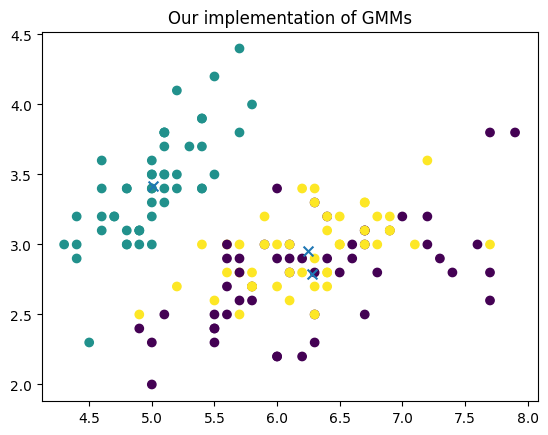

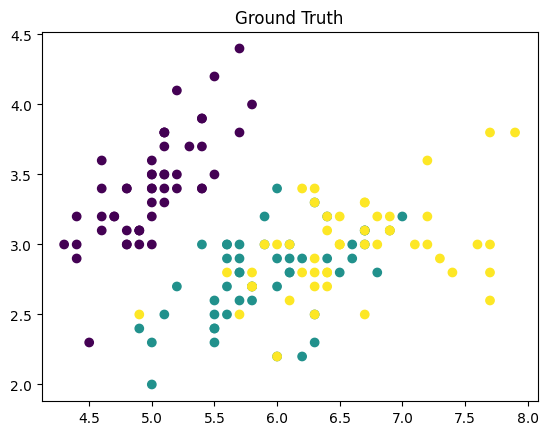

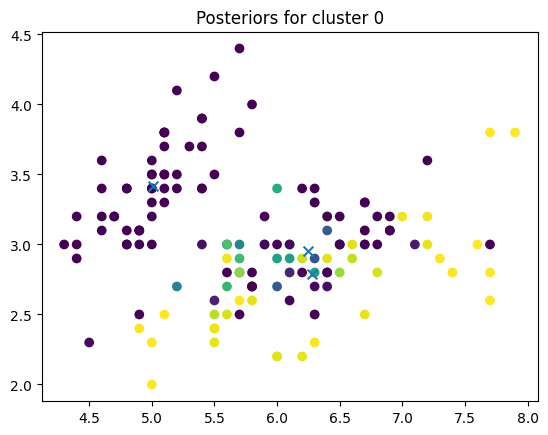

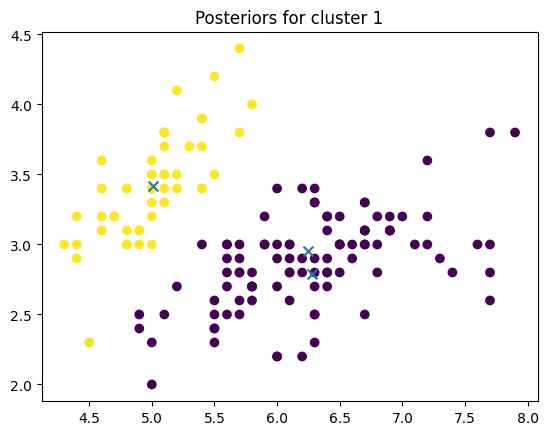

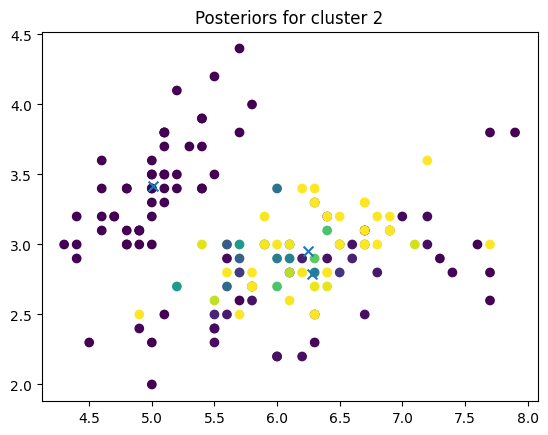

In [19]:
g = 3
n_iteration = 100

predicted_label, posteriors, centroids, cov, mix = gmm(data, g, n_iteration, 'print')

# Visualisation of model predictions
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
plt.title('Our implementation of GMMs')
plt.show()

# Visualisation of ground truth
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground Truth')
plt.show()

# Visualisation of model posteriors
for i_component in range(g):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=posteriors[:, i_component])
    plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
    plt.title(f'Posteriors for cluster {i_component}')
    plt.show()